**DEPENDENCIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

**DATA UPLOADING**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/Data/IMDB-Dataset.csv', encoding='latin-1')

**DATA CLEANING**

In [8]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english') #Downloading English stopwords - In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'off', "doesn't", 'hasn', 'hadn', 'how', "shan't", 'those', 'were', "wasn't", 'these', 'about', 'his', 'he', 'in', 'shall', 'with', 'that', 'than', 'doesn', "hasn't", 'myself', 'here', 'on', 'our', 'own', 'there', 'after', 'could', 'mustn', 'had', 'once', 'was', 'then', 'very', 'ain', 'by', 'out', 'more', 'its', 'your', 'ours', 'won', "don't", 'my', 'below', 'up', 'the', 'has', 'her', 'under', 'before', 'and', 'to', 'no', 'further', 'same', 'y', 'them', 'i', "couldn't", 'whom', 'didn', 'some', 'am', 'himself', 'yourselves', 'is', 're', 'been', "you'll", 'nor', "hadn't", 'from', 'above', 'only', 'do', 'itself', 'mightn', "shouldn't", 'so', 'are', 'o', 'ourselves', 'as', 'or', 'doing', 'because', 'we', 'against', 'would', 'this', 'shouldn', 'might', "you're", "won't", "mustn't", 'between', 'through', "aren't", "isn't", "she's", 'for', "mightn't", "wouldn't", 'yours', 'of', 'hers', "you'd", 'but', "didn't", 'yourself', "weren't", 'where', 'an', 'themselves', 'herself', 'over', 'most', "y

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**PREPROCESSING DATA BY REMOVING STOPWORDS, URLS, SPECIAL CHARACTERS AND EXPANDING CONTRACTIONS**

In [9]:
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

#Data preprocessing using above methods
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

**APPLYING THE DATA CLEANING ON OUR DATASET**

In [10]:
pd.options.display.max_colwidth = 1000
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f...",disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth film write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come film making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserv...
1,1,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actual

**DATA SUMMARY**

In [11]:
#Checking empty values
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [12]:
#Basic descriptive statistics
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [13]:
#Basic statistics on cleaned reviewed column
df['Reviews_clean'].describe()

count                                                                   150000
unique                                                                  149755
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_clean, dtype: object

In [14]:
#Checking unique reviews and movies
print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149755
Unique movie names:14205
No of ratings:150000


**EXPLORATORY DATA ANALYSIS**

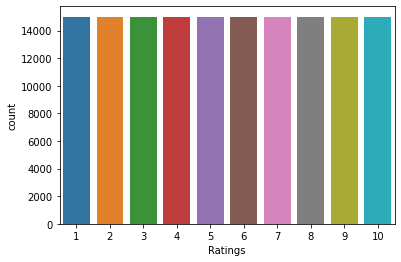

1     15000
2     15000
4     15000
3     15000
5     15000
6     15000
8     15000
7     15000
10    15000
9     15000
Name: Ratings, dtype: int64


In [15]:
#Checking class imbalance
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

(-0.5, 1499.5, 799.5, -0.5)

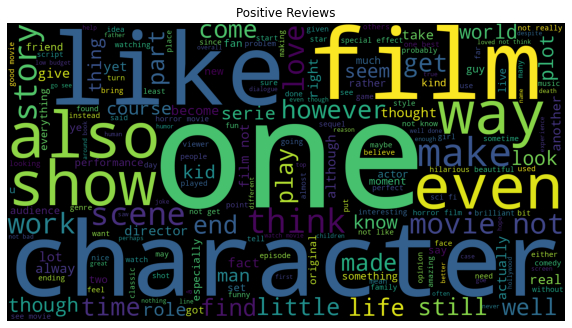

In [16]:
#Visualizing most used words in positive comments(Keeping above 7 rating as positive comments)
sentences=df['Reviews_clean']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))
  
pos_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(pos) 

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

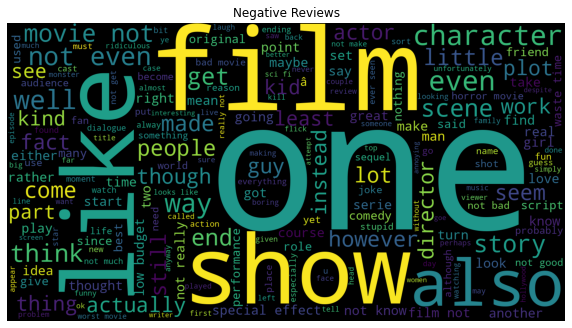

In [17]:
#Visualizing most used words in negative comments(Keeping any below 4 rating as negative comments )

neg_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(neg) 

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show() 

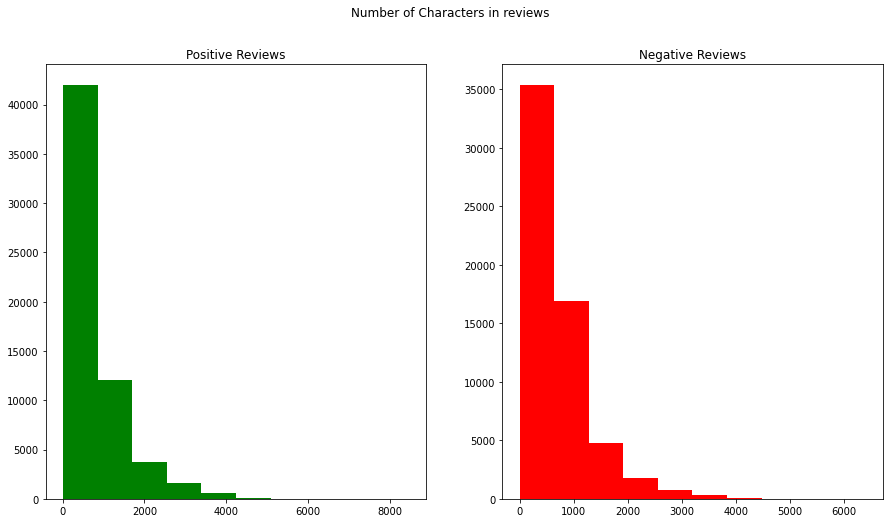

In [18]:
#Visulaization of number of charactor in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Ratings']>=7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()

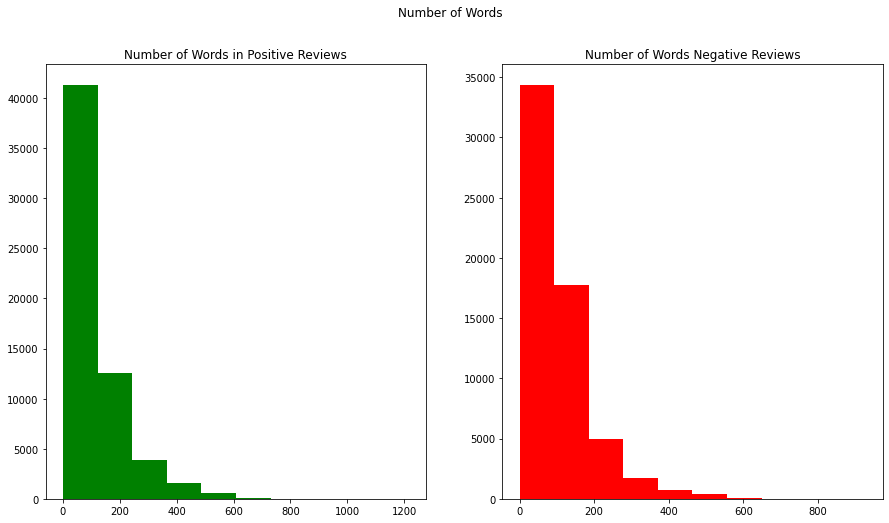

In [19]:
#Visulaization of number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of Words Negative Reviews')
figure.suptitle('Number of Words')
plt.show()

Text(0.5, 0.98, 'Average word length in Reviews')

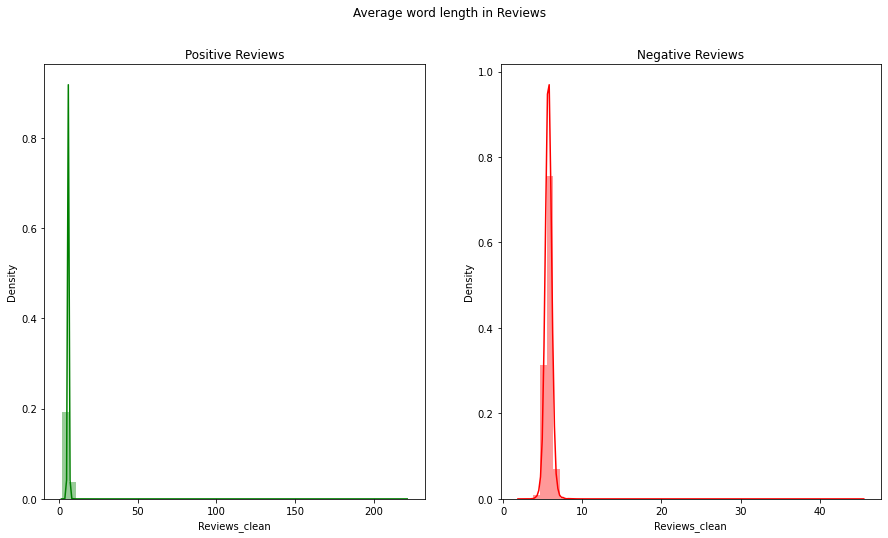

In [20]:
#Visulaize average of words in reviews

figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')

In [21]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [23]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<4],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()